

# Project: No-show appointments Dataset Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
   The aim of this project is to analyze a dataset, and the dataset I chose is No-show appointments. 
The dataset contains 100k medical appointments in Brazil, which were collected to analyze and find why patients were absent from their appointments. 

The dataset contains the following attributes: 
PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, and finally the last attribute show, which indicates the final result whether the patient shows up for the appointment or not.



### Question(s) for Analysis
Given the dataset, we will try to answer multiple questions to find the relation between the given attributes and the reasons why patients miss their appointment. 
first, who misses their appointments most, men or women?, 
Second, Is there a relationship between diabetes or  Alcoholism and the absence of a patient?.

In [197]:
conda install numpy scipy pandas matplotlib seaborn

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [10]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [11]:
# Reading dataset 
df = pd.read_csv('KaggleV2-May-2016.csv')

In [12]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Attributes 
#### PatientId: unqiue identifier of the Patient.
#### AppointmentID:  unique identifier of the appointment.
#### Gender: gender of the patient.
#### ScheduledDay: the day the patient set up their appointment.
#### AppointmentDay: day of the appointment.
#### Age: age of the patient.
#### Neighbourhood: location of the hospital.
#### Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
#### Hipertension: indicates if the patient has high blood pressure.
#### Diabetes: indicate if the patient has diabetes.
#### Alcoholism: indicates if the patient is drinking alcohol that results in significant mental or physical health problems.
#### Handcap:  refers to the number of desabilites a patient has.
#### SMS_received: indicates if the patient received an SMS before the appointment.
#### No-show: indicates that the patient didn't show up for his appointment.

In [13]:
#Data visualisation
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

In [14]:
#defining shape
df.shape

(110527, 14)

#### Dataset has 110527 rows and 14 columns. rows representing patient records, while columns are the attributes of the dataset.  

### The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [15]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### There is no null Values 

 ### df.describe() returns description of the data in the DataFrame.

In [16]:
#statical analysis
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### We noticed unreal value for age, which will be handled in the data Cleaning phase.

In [17]:
#number of disease patiants
for i in df[['Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'Handcap', 'SMS_received', 'No-show']]:
    print(df[i].value_counts())
    print('\n')

0    99666
1    10861
Name: Scholarship, dtype: int64


0    88726
1    21801
Name: Hipertension, dtype: int64


0    107167
1      3360
Name: Alcoholism, dtype: int64


0    102584
1      7943
Name: Diabetes, dtype: int64


0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


0    75045
1    35482
Name: SMS_received, dtype: int64


No     88208
Yes    22319
Name: No-show, dtype: int64




#### From the previous code results, we can get a simple observation of which attributes can be used for comparison, is there equality of each attribute Value between them or there is an attribute value that patients are biased to? 


### Data Cleaning
#### in this section, we make pre-processing for the data, handling null values, unifying data, and removing duplicate records.  
 

In [18]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### As shown in the above result the dataset has no null values for all the variables.

### Drop Unreal Values 

In [19]:
#searching for -1 age
df.loc[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [20]:
#deleting the record with unreal value of age 
df.drop(index=99832,inplace=True)

#pring result after deleting to confirm the opreation 
df.loc[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Drop Dubblicated Records

In [21]:
#number of duplicated raws
df.duplicated().sum()

0

In [22]:
#number of duplicated values in patient id
df['PatientId'].duplicated().sum() #out of 110526 

48228

In [23]:
#number of duplicated values in patient id, with same result 
df[['PatientId','No-show']].duplicated().sum()

38710

In [24]:
#it is better to drop the records for the same patient with the same final results of showing for an appointment or not
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No


#### it is better to drop the records for the same patient with the same final results of showing for an appointment or not, as it will give biased results in the analysis phase.


In [25]:
#check number of duplicated values in patient id, with same result 
df[['PatientId','No-show']].duplicated().sum()

0

### Unify Dataset Attributes Format
#### to make it easier to interpret and analyze. 

In [26]:
#conveting Scholarship, Hipertension, Alcoholism, Diabetes, and SMS_received to boolean format
for i in df[['Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'SMS_received']]:
    df[i]=df[i].astype('bool')
    
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,0,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,False,False,False,False,0,True,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,False,False,False,False,0,True,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,False,False,False,False,0,True,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,False,False,False,False,0,True,No


### Change Labels Name 

### The class label no show is confusing, so i replace it with a meaningful word 

In [27]:
df.rename(columns = {'No-show':'Absent'}, inplace = True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Absent
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,0,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,False,False,False,False,0,True,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,False,False,False,False,0,True,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,False,False,False,False,0,True,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,False,False,False,False,0,True,No


### Drop Unused Attributes 

In [28]:
#columns ["PatientId","AppointmentID”] are useless, so its bettrer to drop them
df = df.drop(["PatientId","AppointmentID"],axis=1)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Absent
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,0,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110518,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,False,False,False,False,0,True,No
110520,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,False,False,False,False,0,True,No
110521,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,False,False,False,False,0,True,No
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,False,False,False,False,0,True,No


### Change some attributes type 

In [29]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          71816 non-null  object             
 1   ScheduledDay    71816 non-null  datetime64[ns, UTC]
 2   AppointmentDay  71816 non-null  datetime64[ns, UTC]
 3   Age             71816 non-null  int64              
 4   Neighbourhood   71816 non-null  object             
 5   Scholarship     71816 non-null  bool               
 6   Hipertension    71816 non-null  bool               
 7   Diabetes        71816 non-null  bool               
 8   Alcoholism      71816 non-null  bool               
 9   Handcap         71816 non-null  int64              
 10  SMS_received    71816 non-null  bool               
 11  Absent          71816 non-null  object             
dtypes: bool(5), datetime64[ns, UTC](2), int64(2), object(3)
memory usage: 4.7+ MB


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: Who is mostly being absent from their appointments males or females?

In [30]:
#Importing libraries 
%matplotlib inline

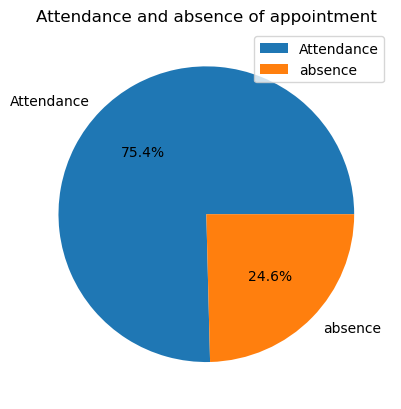

In [31]:
mylabels = ["Attendance", "absence"]

plt.pie(df.Absent.value_counts(),  autopct='%1.1f%%', labels = mylabels)
plt.title('Attendance and absence of appointment')
plt.legend()
plt.show()

#### As illustrated in the above pie chart, attendance patients were represented with blue color and absence patients with orange color, as blue color takes 75.4% of the pie chart means that most of the patients of the given dataset were attendants. 

#### Now let see percentage of female and male on the dataset

Text(0.5, 1.0, 'Gender')

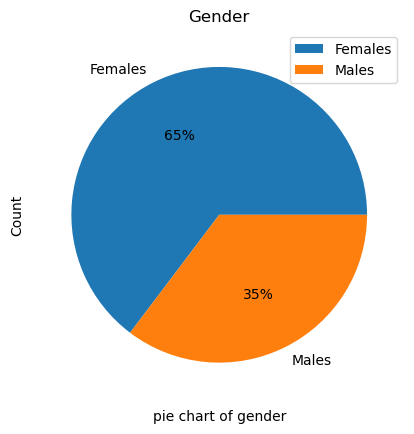

In [32]:

df.Gender.value_counts().plot(kind="pie",labels =mylabels, autopct='%1.0f%%')
plt.legend()
plt.ylabel("Count")
plt.xlabel("pie chart of gender")
plt.title("Gender")

#### Pie chart show that 65% of patients are Females and 35% Males.

#### Now let see percentage of absent  female and male on the dataset

In [42]:
# Create Attendance and absence dataframe 
Attendance = df[df['Absent']=='No']
#df.head()
absence = df[df['Absent']=='Yes']

Attendance.shape , absence.shape

((54153, 12), (17663, 12))

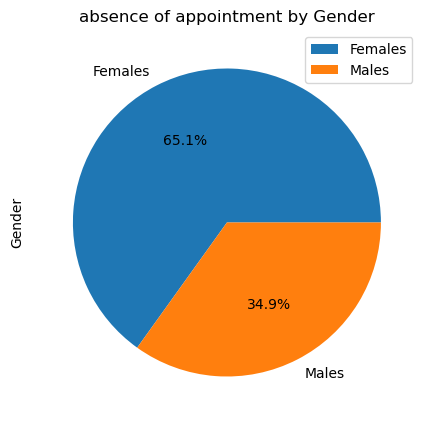

In [51]:
# Gender condition for Absence Patients 
absence_Gender = absence.Gender.value_counts(normalize = True).mul(100).round(1).astype('float')
absence_Gender.plot(kind='pie', labels = mylabels, figsize=(5,5),autopct='%1.1f%%');
plt.title('absence of appointment by Gender');
plt.legend()

#### As illustrated in the above pie chart, females are most likely to be absent  for their appointments as they represent 65.1%, while only 34.9% were male.

### Research Question 2 : Is there a relationship between diabetes or  Alcoholism and the absence of a patient?

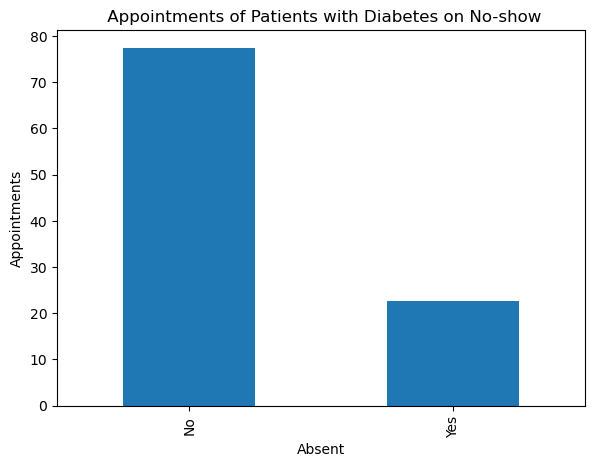

In [82]:
def relationBarChart(x):
    amount_ofVariable = sum(df.groupby(['Absent']).sum()[x])
    Variable = df.groupby(['Absent']).sum()[x]/amount_ofVariable * 100
    # Styling and defining the graphs
    fig = plt.figure(figsize=(15,40))
    plt.subplot(7,2,2);
    Variable.plot.bar();
    plt.title(' Appointments of Patients with '+ x +' on No-show')
    plt.xlabel('Absent')
    plt.ylabel('Appointments')
    
relationBarChart('Diabetes')

#### As illustrated in the above bar chart, the number of attendance diabetes patients is much more than absent diabetes patients. 

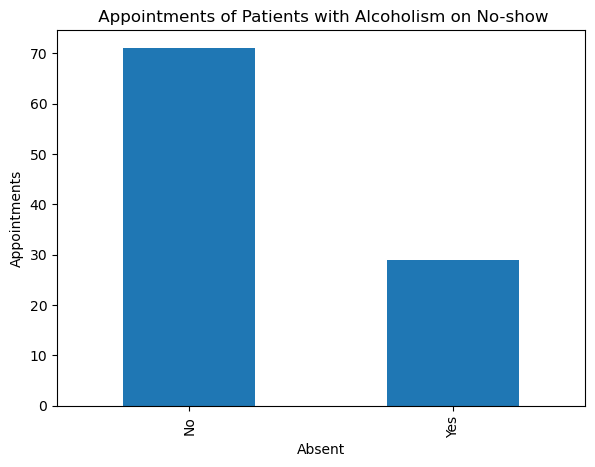

In [83]:
relationBarChart('Alcoholism')

#### As illustrated in the above bar chart, the number of attendance of Alcoholism patients is much more than the absence of Alcoholism patients. 

<a id='conclusions'></a>
## Conclusions

To sum up, after analyzing the No-Show appointment dataset, we found that male is more likely to be absent from their appointments than female. 
Diabetes or Alcoholism is not a strong factor for patients being absent or not,  as there a large percentage of Alcoholism and Diabetes patients who still attend their appointments. 

Limitation:
First, the address where the patient lives could be useful to predict if he is in the same neighborhood as the hospital, and is patient less likely to be absent or not. 
Also, the time of the appointment was not given, it can be useful to predict if there is a relation between early morning appointments and the absence of the patient. 



# References 

[1]GeeksforGeeks. (2021, August 25). Python | Pandas dataframe.info(). https://www.geeksforgeeks.org/python-pandas-dataframe-info/

[2]Alcohol use disorder (2022) Mayo Clinic. Mayo Foundation for Medical Education and Research. Available at: https://www.mayoclinic.org/diseases-conditions/alcohol-use-disorder/symptoms-causes/syc-20369243 (Accessed: November 22, 2022). 

[3]Mohamedkhaledelsafty (2021) Medical appointment no shows analysis, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/mohamedkhaledelsafty/medical-appointment-no-shows-analysis#Introduction (Accessed: November 25, 2022). 